In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
import pandas as pd
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage

# Load data
df = pd.read_csv('/content/TA_final.csv')

# Map categorical variables directly
df['gender'] = df['gender'].map({'M': -1, 'F': 1})
df['trait_anx_level'] = df['trait_anx_level'].map({'low': 0, 'high': 1})

# Drop non-numeric and zero-variance columns
df_numeric = df.select_dtypes(include='number')
df_numeric = df_numeric.loc[:, df_numeric.std() != 0]

# Compute correlation matrix
corr = df_numeric.corr()
corr.fillna(0, inplace=True)

# Convert correlation to distance
distance_matrix = 1 - corr
condensed_dist = squareform(distance_matrix, checks=False)

# Hierarchical clustering
linkage_matrix = linkage(condensed_dist, method='average')

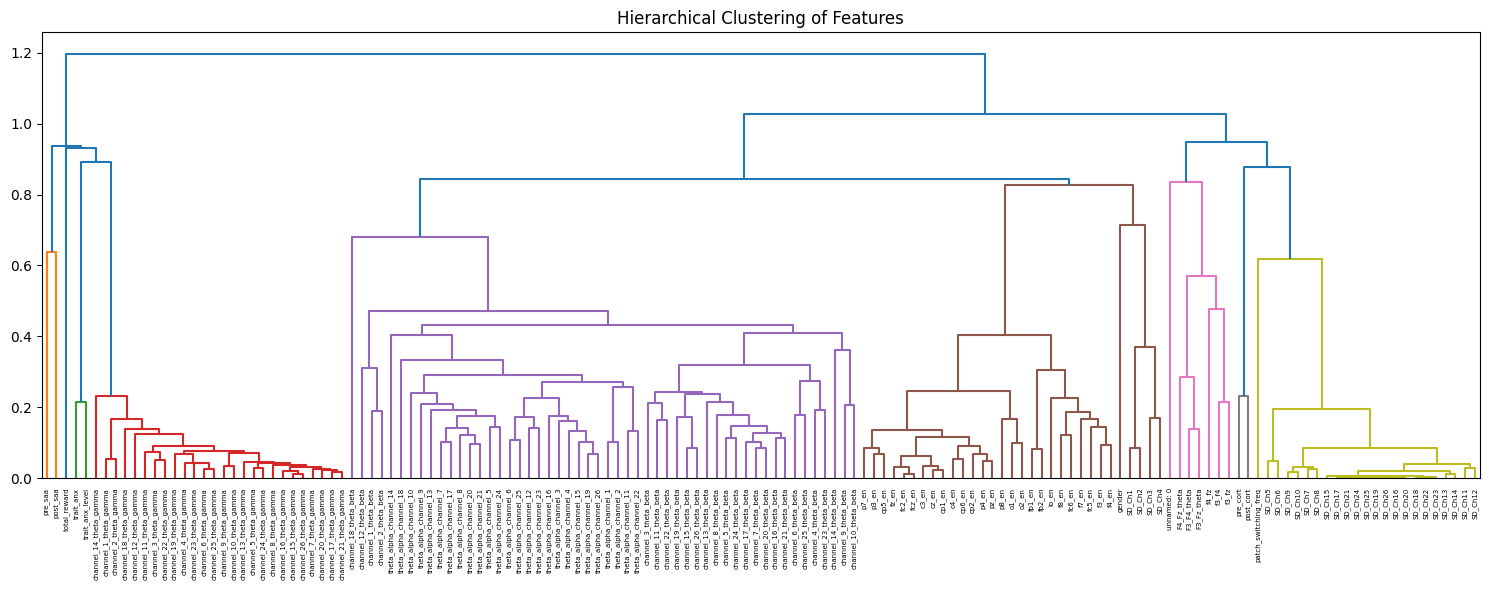

In [ ]:
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels=corr.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering of Features')
plt.tight_layout()
plt.savefig('/content/feature_dendrogram_participant_combined.png', dpi=300)  # <-- Save the image
plt.show()

In [ ]:
cf = pd.read_csv('/content/All_epochs_combined_e1 (1).csv')


# Drop non-numeric and zero-variance columns
cf['Decision'] = cf['Decision'].map({'stay': 1, 'leave': 0})
cf['trait_anx_level'] = cf['trait_anx_level'].map({'low': 0, 'high': 1})

# Compute correlation matrix
corr = cf.corr()

# Replace NaNs with 0 (or you could use 1 if you want max distance)
corr.fillna(0, inplace=True)

# Compute condensed distance matrix from correlation
distance_matrix = 1 - corr
condensed_dist = squareform(distance_matrix, checks=False)

# Apply hierarchical clustering
linkage_matrix = linkage(condensed_dist, method='average')


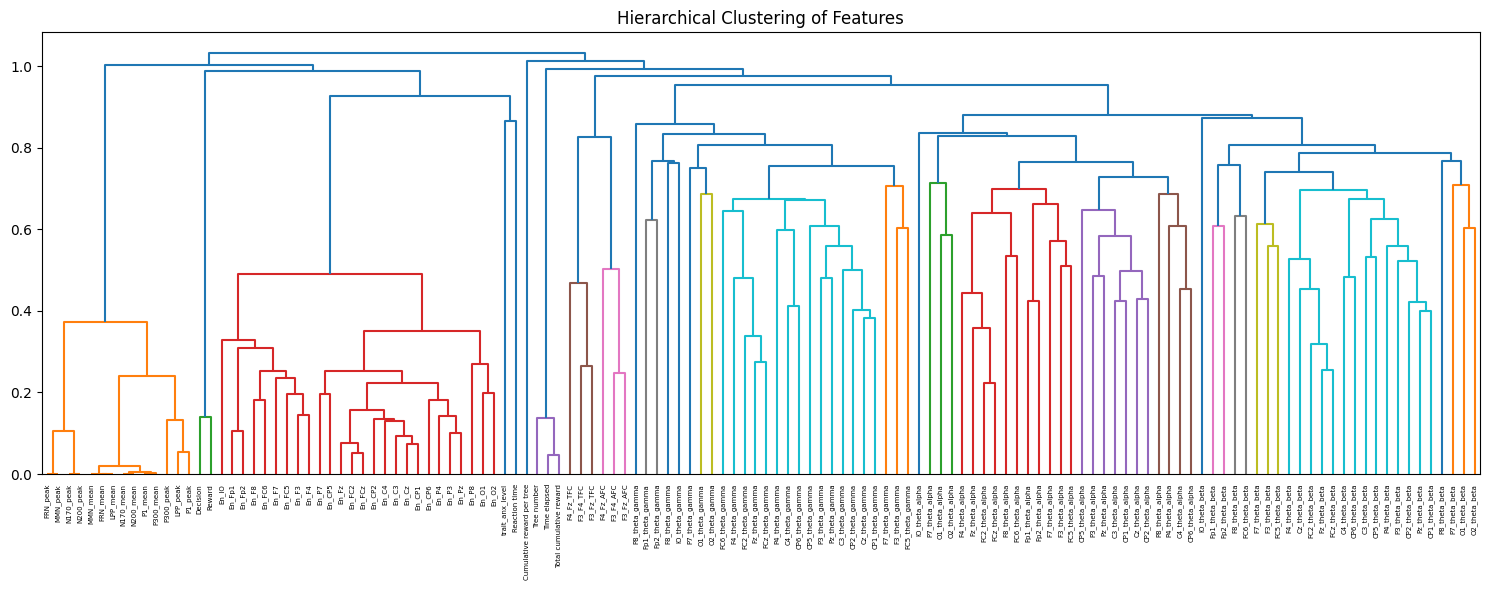

In [ ]:
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels=corr.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering of Features')
plt.tight_layout()
plt.savefig('/content/epcoh_e1.png', dpi=300)  # <-- Save the image
plt.show()

In [ ]:
cf = pd.read_csv('/content/All_epochs_combined_e2 (1).csv')


# Drop non-numeric and zero-variance columns
cf['Decision'] = cf['Decision'].map({'stay': 1, 'leave': 0})
cf['trait_anx_level'] = cf['trait_anx_level'].map({'low': 0, 'high': 1})

# Compute correlation matrix
corr = cf.corr()

# Replace NaNs with 0 (or you could use 1 if you want max distance)
corr.fillna(0, inplace=True)

# Compute condensed distance matrix from correlation
distance_matrix = 1 - corr
condensed_dist = squareform(distance_matrix, checks=False)

# Apply hierarchical clustering
linkage_matrix = linkage(condensed_dist, method='average')


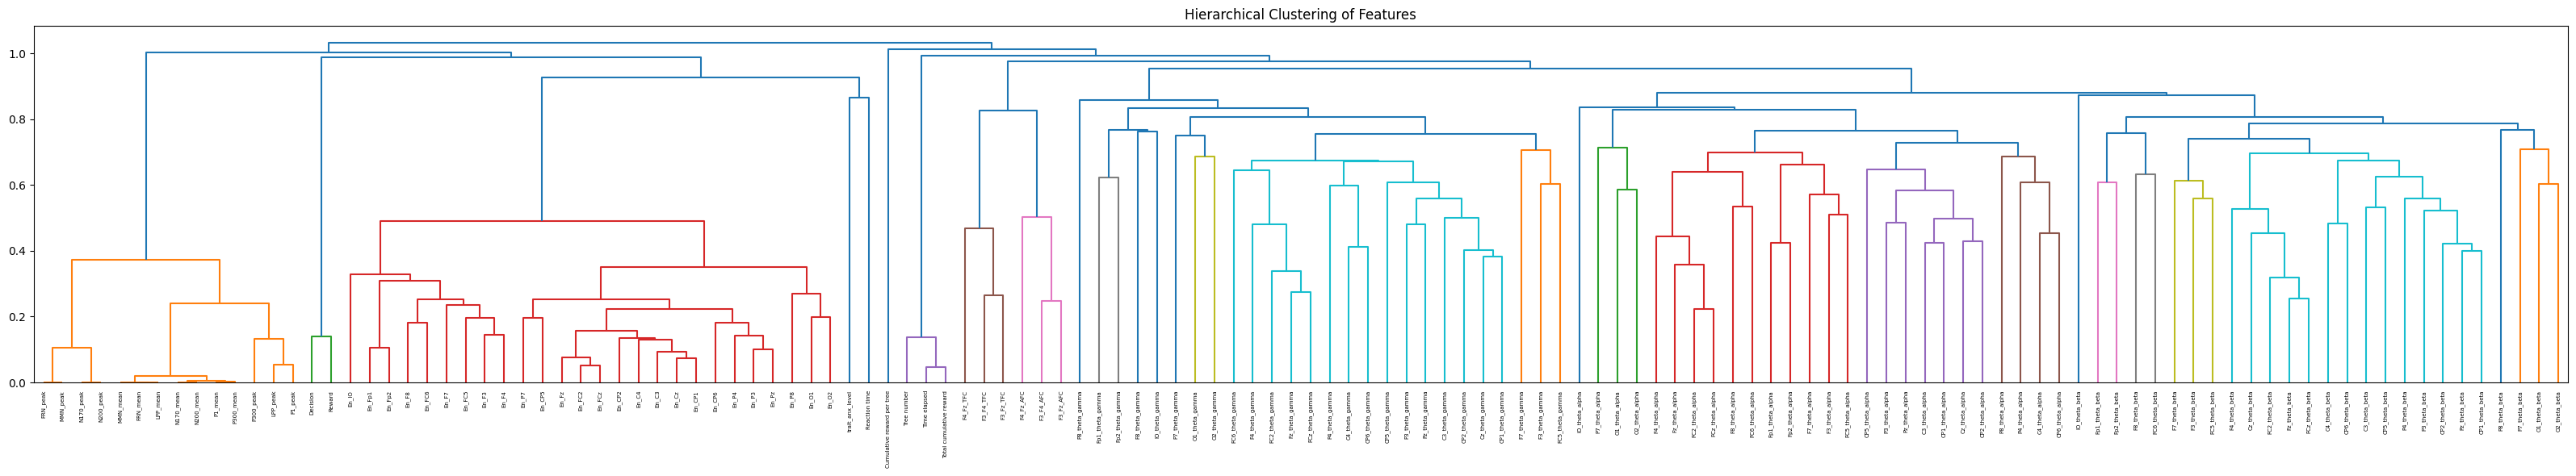

In [ ]:
plt.figure(figsize=(32, 6))
dendrogram(linkage_matrix, labels=corr.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering of Features')
plt.tight_layout()
plt.savefig('/content/epoch_e2.png', dpi=300)  # <-- Save the image
plt.show()

In [ ]:
from scipy.cluster.hierarchy import to_tree

# Get tree object
root, nodes = to_tree(linkage_matrix, rd=True)

# Map variable names to indices
var_names = list(corr.columns)
name_to_idx = {name: i for i, name in enumerate(var_names)}

# Function to get distance between two variables
def get_distance_between(var1, var2):
    idx1 = name_to_idx[var1]
    idx2 = name_to_idx[var2]

    # Traverse from leaves to root to find the lowest common ancestor
    def path_to_root(node):
        path = []
        while node is not None:
            path.append(node.id)
            node = node.parent
        return path

    node1 = nodes[idx1]
    node2 = nodes[idx2]

    path1 = path_to_root(node1)
    path2 = path_to_root(node2)

    # Find lowest common ancestor
    lca_id = next(n for n in path1 if n in path2)
    lca_node = nodes[lca_id]

    return lca_node.dist

# Example usage:


In [ ]:
cf = pd.read_csv('/content/All_epochs_combined (1).csv')


# Drop non-numeric and zero-variance columns
cf['Decision'] = cf['Decision'].map({'stay': 1, 'leave': 0})
cf['trait_anx_level'] = cf['trait_anx_level'].map({'low': 0, 'high': 1})

# Compute correlation matrix
corr = cf.corr()

# Replace NaNs with 0 (or you could use 1 if you want max distance)
corr.fillna(0, inplace=True)

# Compute condensed distance matrix from correlation
distance_matrix = 1 - corr
condensed_dist = squareform(distance_matrix, checks=False)

# Apply hierarchical clustering
linkage_matrix = linkage(condensed_dist, method='average')


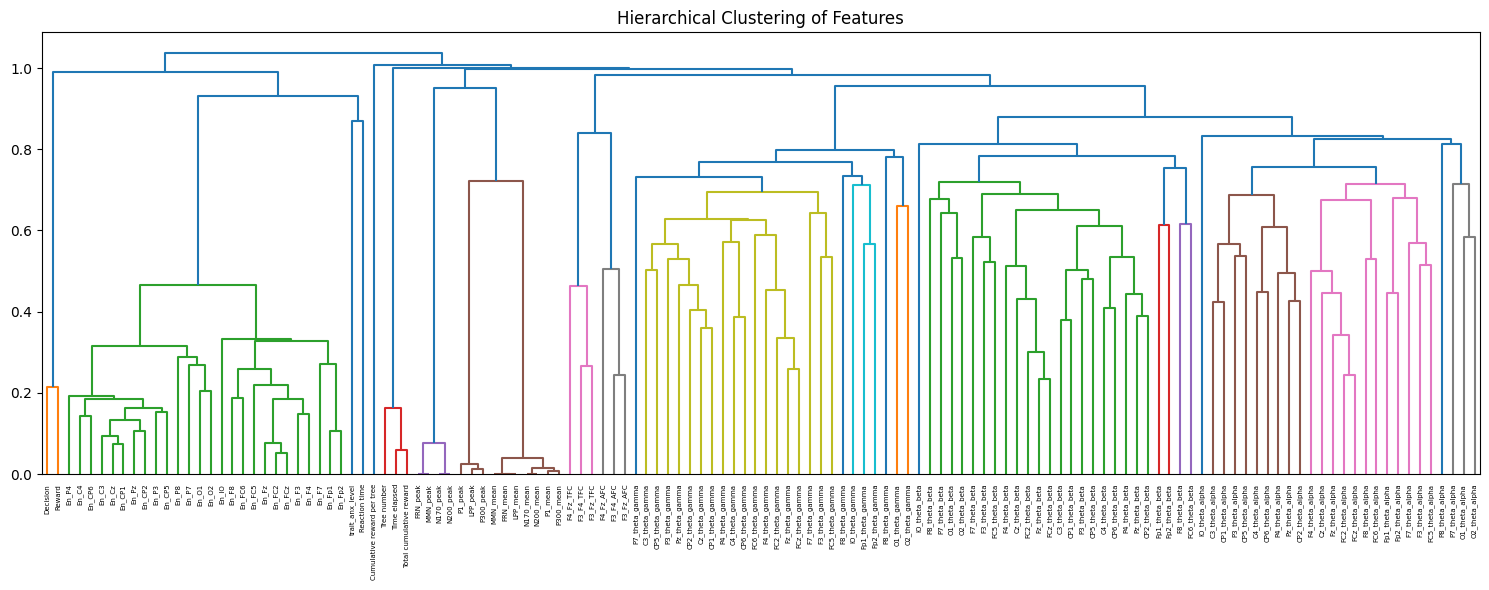

In [ ]:
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels=corr.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering of Features')
plt.tight_layout()
plt.savefig('/content/epoch_all.png', dpi=300)  # <-- Save the image
plt.show()